# **Deep learning Lab Assignment**
**Name:** Ayush Rewatkar    
**Div:** A  
**Batch:** DL-1  
**Roll No:** 12  
**PRN No:** 202201040033  

#**Binary Classification**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Selecting class "Airplane" (label 0) and merging others into "Not Airplane" (label 1)
y_train_binary = np.where(y_train == 0, 0, 1)
y_test_binary = np.where(y_test == 0, 0, 1)

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train_binary, epochs=5, validation_data=(x_test, y_test_binary), batch_size=64)

# Model summary
model.summary()

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_binary, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9063 - loss: 0.2780 - val_accuracy: 0.9180 - val_loss: 0.2324
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9260 - loss: 0.1979 - val_accuracy: 0.9356 - val_loss: 0.1754
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9361 - loss: 0.1724 - val_accuracy: 0.9368 - val_loss: 0.1701
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9461 - loss: 0.1453 - val_accuracy: 0.9354 - val_loss: 0.1656
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9508 - loss: 0.1295 - val_accuracy: 0.9468 - val_loss: 0.1452


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,066,949 (4.07 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 711,300 (2.71 MB)

313/313 - 1s - 4ms/step - accuracy: 0.9468 - loss: 0.1452
Test Accuracy: 0.9468


#**Multiclass Classification**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Multiclass classification (10 classes)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)

# Model summary
model.summary()

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3391 - loss: 1.7926 - val_accuracy: 0.5580 - val_loss: 1.2403
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5636 - loss: 1.2243 - val_accuracy: 0.6192 - val_loss: 1.0659
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6304 - loss: 1.0470 - val_accuracy: 0.6467 - val_loss: 1.0078
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6755 - loss: 0.9257 - val_accuracy: 0.6814 - val_loss: 0.9158
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7091 - loss: 0.8285 - val_accuracy: 0.6904 - val_loss: 0.8840


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,070,432 (4.08 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 713,622 (2.72 MB)

313/313 - 1s - 3ms/step - accuracy: 0.6904 - loss: 0.8840
Test Accuracy: 0.6904


#**Pretrained Model (VGG16,ResNet50,MoblieNet)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Function to create a model with Transfer Learning
def create_pretrained_model(base_model):
    base_model.trainable = False  # Freeze base model layers
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load pre-trained models (without top layers)
vgg16_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
resnet50_base = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Create models
vgg16_model = create_pretrained_model(vgg16_base)
resnet50_model = create_pretrained_model(resnet50_base)
mobilenet_model = create_pretrained_model(mobilenet_base)

# Train models (only showing VGG16, repeat for others)
history_vgg16 = vgg16_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)
history_resnet50 = resnet50_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)
history_mobilenet = mobilenet_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)

# Model summaries
print("\nVGG16 Model Summary:")
vgg16_model.summary()

print("\nResNet50 Model Summary:")
resnet50_model.summary()

print("\nMobileNetV2 Model Summary:")
mobilenet_model.summary()

# Evaluate models
print("\nVGG16 Accuracy:")
vgg16_model.evaluate(x_test, y_test)

print("\nResNet50 Accuracy:")
resnet50_model.evaluate(x_test, y_test)

print("\nMobileNetV2 Accuracy:")
mobilenet_model.evaluate(x_test, y_test)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


<ipython-input-4-c451b73e33e9>:31: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.4562 - loss: 1.5775 - val_accuracy: 0.5576 - val_loss: 1.2756
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5712 - loss: 1.2223 - val_accuracy: 0.5739 - val_loss: 1.2186
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5986 - loss: 1.1496 - val_accuracy: 0.5869 - val_loss: 1.1790
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6120 - loss: 1.1139 - val_accuracy: 0.5881 - val_loss: 1.1906
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6205 - loss: 1.0829 - val_accuracy: 0.5982 - val_loss: 1.1578
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.2061 - loss: 2.1756 - val_accuracy: 0.3169 - val_loss: 1.9253
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3113 - loss: 1.9058 - val_accuracy: 0.3192 - val_loss: 1.8599
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/s

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,915,552 (56.90 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 133,910 (523.09 KB)


ResNet50 Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,378,400 (93.00 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 527,126 (2.01 MB)


MobileNetV2 Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753,760 (10.50 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 330,518 (1.26 MB)


VGG16 Accuracy:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6005 - loss: 1.1550

ResNet50 Accuracy:
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3878 - loss: 1.7277

MobileNetV2 Accuracy:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3579 - loss: 1.7961


[1.8019746541976929, 0.35370001196861267]

#**Fine Tuning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Load pre-trained VGG16 model
vgg16_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze the first few layers and unfreeze the last few layers for fine-tuning
for layer in vgg16_base.layers[:10]:  # Freeze first 10 layers
    layer.trainable = False

# Build fine-tuned model
model = keras.Sequential([
    vgg16_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile model with a lower learning rate for fine-tuning
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

# Model summary
print("\nFine-Tuned VGG16 Model Summary:")
model.summary()

# Evaluate model
print("\nFine-Tuned VGG16 Accuracy:")
model.evaluate(x_test, y_test)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 50ms/step - accuracy: 0.5473 - loss: 1.3172 - val_accuracy: 0.7556 - val_loss: 0.7164
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 42ms/step - accuracy: 0.7765 - loss: 0.6726 - val_accuracy: 0.7810 - val_loss: 0.6569
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.8336 - loss: 0.5079 - val_accuracy: 0.7977 - val_loss: 0.6181
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8819 - loss: 0.3565 - val_accuracy: 0.8047 - val_loss: 0.6156
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9216 - loss: 0.2403 - val_accuracy: 0.8105 - val_loss: 0.6503
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9465 - loss: 0.1664 - val_accuracy: 0.7957 - val_loss: 0.7841
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9634 - loss: 0.1201 - val_accuracy: 0.7899 - val_loss: 0.8604
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9715 - loss: 0.0908 - 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,074,784 (156.69 MB)

 Trainable params: 13,113,098 (50.02 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

 Optimizer params: 26,226,198 (100.05 MB)


Fine-Tuned VGG16 Accuracy:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7895 - loss: 0.9812


[0.9759486317634583, 0.7926999926567078]

#**Comparative Analysis**

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.datasets import cifar10
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Function to build, train, and evaluate models
def evaluate_model(model, name, epochs=5):
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=64, verbose=1)
    end_time = time.time()

    # Evaluate model performance
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Store model details
    return {
        "Model": name,
        "Accuracy": round(accuracy * 100, 2),  # Convert to percentage
        "Loss": round(loss, 4),
        "Parameters": model.count_params(),
        "Training Time (s)": round(end_time - start_time, 2)
    }

# CNN from Scratch (Multiclass)
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_results = evaluate_model(cnn_model, "CNN from Scratch")

# VGG16 (Pretrained)
vgg16_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
vgg16_base.trainable = False  # Freeze all layers
vgg16_model = keras.Sequential([vgg16_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_results = evaluate_model(vgg16_model, "VGG16 (Pretrained)")

# ResNet50 (Pretrained)
resnet50_base = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
resnet50_base.trainable = False
resnet50_model = keras.Sequential([resnet50_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_results = evaluate_model(resnet50_model, "ResNet50 (Pretrained)")

# MobileNetV2 (Pretrained)
mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))
mobilenet_base.trainable = False
mobilenet_model = keras.Sequential([mobilenet_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_results = evaluate_model(mobilenet_model, "MobileNetV2 (Pretrained)")

# Fine-Tuned VGG16
for layer in vgg16_base.layers[:10]:  # Unfreeze last few layers
    layer.trainable = True
fine_tuned_vgg16 = keras.Sequential([vgg16_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(256, activation='relu'), keras.layers.Dropout(0.5), keras.layers.Dense(10, activation='softmax')])
fine_tuned_vgg16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
fine_tuned_vgg16_results = evaluate_model(fine_tuned_vgg16, "Fine-Tuned VGG16")

# Create DataFrame for results
df = pd.DataFrame([cnn_results, vgg16_results, resnet50_results, mobilenet_results, fine_tuned_vgg16_results])

# Print results
print("\nComparative Analysis of Models (Accuracy & Loss):\n")
print(df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3474 - loss: 1.7545 - val_accuracy: 0.5666 - val_loss: 1.2291
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5831 - loss: 1.1861 - val_accuracy: 0.6443 - val_loss: 1.0222
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6433 - loss: 1.0037 - val_accuracy: 0.6652 - val_loss: 0.9602
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6970 - loss: 0.8659 - val_accuracy: 0.6741 - val_loss: 0.9314
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7230 - loss: 0.7899 - val_accuracy: 0.6761 - val_loss: 0.9245
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.3637 - loss: 1.8536 - val_accuracy: 0.5122 - val_loss: 1.4288
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5330 - loss: 1.3751 - val_accuracy: 0.5427 - val_loss: 1.3356
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5580 - loss: 1.2991 - val_accuracy: 0.55

<ipython-input-7-0157f30ddf09>:65: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.2375 - loss: 2.1684 - val_accuracy: 0.2931 - val_loss: 1.9944
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3024 - loss: 1.9710 - val_accuracy: 0.3030 - val_loss: 1.9419
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3107 - loss: 1.9264 - val_accuracy: 0.3063 - val_loss: 1.9214
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3142 - loss: 1.9042 - val_accuracy: 0.3079 - val_loss: 1.9111
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3184 - loss: 1.8924 - val_accuracy: 0.3119 - val_loss: 1.9046
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.3565 - loss: 1.7916 - val_accuracy: 0.6703 - val_loss: 0.9263
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6754 - loss: 0.9421 - val_accuracy: 0.7347 - val_loss: 0.7611
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.7477 - loss: 0.7402 - val_accuracy: 

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Function to build, train, and store training history
def train_model(model, name, epochs=5):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=64, verbose=1)
    return {"name": name, "history": history}

# CNN from Scratch
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_history = train_model(cnn_model, "CNN from Scratch")

# VGG16 (Pretrained)
vgg16_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
vgg16_base.trainable = False
vgg16_model = keras.Sequential([vgg16_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_history = train_model(vgg16_model, "VGG16 (Pretrained)")

# ResNet50 (Pretrained)
resnet50_base = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
resnet50_base.trainable = False
resnet50_model = keras.Sequential([resnet50_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_history = train_model(resnet50_model, "ResNet50 (Pretrained)")

# MobileNetV2 (Pretrained)
mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))
mobilenet_base.trainable = False
mobilenet_model = keras.Sequential([mobilenet_base, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(10, activation='softmax')])
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_history = train_model(mobilenet_model, "MobileNetV2 (Pretrained)")

#  Fine-Tuned VGG16
for layer in vgg16_base.layers[:10]:
    layer.trainable = True
fine_tuned_vgg16 = keras.Sequential([
    vgg16_base,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
fine_tuned_vgg16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
fine_tuned_vgg16_history = train_model(fine_tuned_vgg16, "Fine-Tuned VGG16")

# List of models
models = [cnn_history, vgg16_history, resnet50_history, mobilenet_history, fine_tuned_vgg16_history]

# Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 5))




Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3462 - loss: 1.7739 - val_accuracy: 0.5493 - val_loss: 1.2707
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5807 - loss: 1.1888 - val_accuracy: 0.6356 - val_loss: 1.0333
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6608 - loss: 0.9683 - val_accuracy: 0.6710 - val_loss: 0.9439
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6966 - loss: 0.8626 - val_accuracy: 0.6901 - val_loss: 0.8900
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7308 - loss: 0.7648 - val_accuracy: 0.6990 - val_loss: 0.8690
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.3773 - loss: 1.8078 - val_accuracy: 0.5143 - val_loss: 1.4294
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5325 - loss: 1.3763 - val_accuracy: 0.5410 - val_loss: 1.3359
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5661 - loss: 1.2843 - val_accuracy: 0.55

<ipython-input-4-e8654409cbf7>:47: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2281 - loss: 2.1737 - val_accuracy: 0.2938 - val_loss: 1.9954
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3010 - loss: 1.9716 - val_accuracy: 0.3040 - val_loss: 1.9424
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3096 - loss: 1.9253 - val_accuracy: 0.3085 - val_loss: 1.9218
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3140 - loss: 1.9070 - val_accuracy: 0.3087 - val_loss: 1.9113
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3202 - loss: 1.8899 - val_accuracy: 0.3108 - val_loss: 1.9049
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.3183 - loss: 1.8886 - val_accuracy: 0.6567 - val_loss: 0.9932
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6523 - loss: 1.0011 - val_accuracy: 0.7238 - val_loss: 0.8014
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.7250 - loss: 0.7976 - val_accuracy:

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

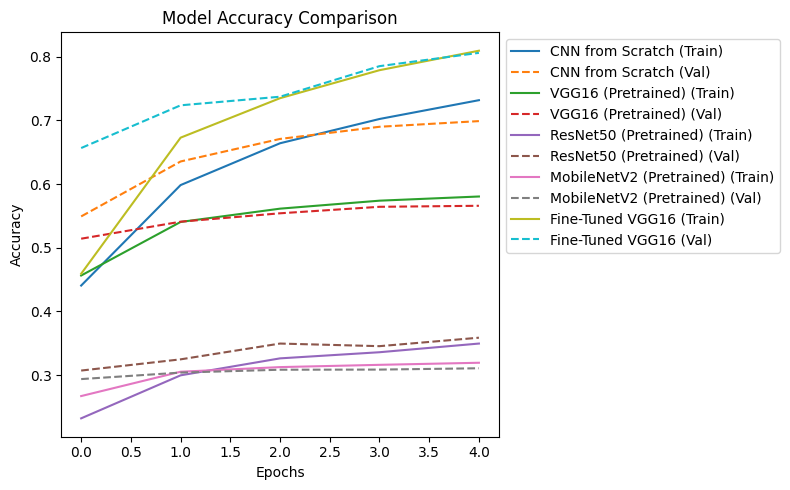

In [5]:
# Plot Accuracy
plt.figure(figsize=(8, 5))
for model in models:
    plt.plot(model["history"].history["accuracy"], label=f"{model['name']} (Train)")
    plt.plot(model["history"].history["val_accuracy"], linestyle="dashed", label=f"{model['name']} (Val)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

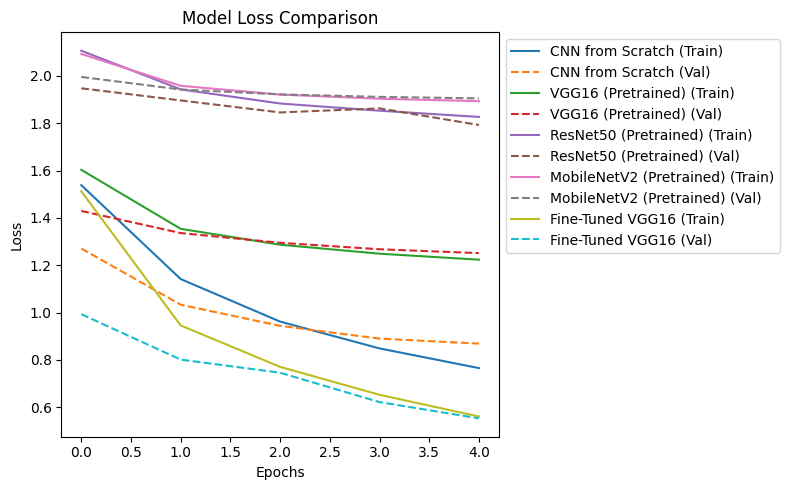

In [6]:
# Plot Loss
plt.figure(figsize=(8, 5))
for model in models:
    plt.plot(model["history"].history["loss"], label=f"{model['name']} (Train)")
    plt.plot(model["history"].history["val_loss"], linestyle="dashed", label=f"{model['name']} (Val)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Comparison")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()